<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-2-Statistics/blob/master/daniel_benson_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



## Let's Create a Function!

In [0]:
# First let's create our function
def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):
  P_drunk = prob_drunk_prior
  P_sober = 1 - P_drunk
  P_pos_given_drunk = 1
  P_pos_given_sober = false_positive_rate
  posterior_probability = (P_pos_given_drunk * P_drunk) / ((P_pos_given_drunk * P_drunk) + (P_pos_given_sober * P_sober))
  return posterior_probability

In [2]:
# Test one with prior = 1/1000; probability = 1.2%
prob_drunk_given_positive(1/1000, 0.08)

0.012357884330202669

In [3]:
# Test two with prior = 0.012357884330202669; probability = 13.5%
prob_drunk_given_positive(0.012357884330202669, 0.08)

0.13525210993291495

## Let's Create a Function!

In [0]:
# How many tests are required for probability to reach 95% or above? Let's create a function for that
def drug_tests_required(prior, false_pos):
  test_number = 0
  test_probability = prior
  while test_probability < 0.95:
    test_probability = prob_drunk_given_positive(test_probability, false_pos)
    test_number += 1
  return test_number


In [5]:
prob_drunk_given_positive(1/1000, 0.08)

0.012357884330202669

In [6]:
drug_tests_required(1/1000, 0.08)

4

In [7]:
# Accroding to our function it will take 4 tests to reach above 95%. Let's 
# test that out the long way to ensure it is correct. We know test 2 has a 
# 13.5% probability. Continuing on to test 3:
prob_drunk_given_positive(0.13525210993291495, 0.08)

0.6615996951348605

In [8]:
# After 3 tests we have a 66.1% probability. Now let's try test 4:
prob_drunk_given_positive(0.6615996951348605, 0.08)

0.9606895076105054

In [0]:
# After 4 tests we are above 95% probability, so we can confirm that our function
# worked correctly.

In [0]:
# Imports
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
?stats.bayes_mvs

In [0]:
# Let's play around with scipy and compare Bayesian results to previously 
# determined frequentist resultsj
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
house_columns = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
           'el-salvador-aid', 'religious-groups-in-schools', 
           'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
           'immigration', 'synfuels-corporation-cutback', 'education-spending',
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 
           'export-administration-act-south-africa']

In [13]:
# Read in the data; turn objects into numbers
df = pd.read_csv(url, header=None, names=house_columns, na_values='?')
df = df.replace({'y':1, 'n':0})
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [14]:
# Seperate into two seperate groups: Republican and Democrat
republican = df[df['Class Name']=='republican']
democrat = df[df['Class Name']=='democrat']
print(republican.shape)
print(democrat.shape)

(168, 17)
(267, 17)


In [15]:
# Look into handicapped-infants data
rep_handi_inf = republican['handicapped-infants']
dem_handi_inf = democrat['handicapped-infants']
# Create means
rep_handi_mean = rep_handi_inf.mean()
print(rep_handi_mean)
dem_handi_mean = dem_handi_inf.mean()
print(dem_handi_mean)

0.18787878787878787
0.6046511627906976


In [0]:
# Create functions to deal with nan values
def rep_column(column):
  rep_col = republican[column]
  rep_no_nans = rep_col[~np.isnan(rep_col)]
  return rep_no_nans

In [0]:
def dem_column(column):
  dem_col = democrat[column]
  dem_no_nans = dem_col[~np.isnan(dem_col)]
  return dem_no_nans

In [0]:
# Create our confidence interval 
def confidence_interval(data, confidence=0.95):
  """
  Calculate confidence interval using a sample mean from specified data.
  Uses t-distribution and 2-tailed test with a default confidence of 0.95

  Arguments: 
  data - iterable (list or numpy array) of sample observations
  confidence - confidence level for the interval

  Return:
  tuple (mean, lower-bound, upper-bound)
  """
  data = np.array(data) # Sets data into numpy array
  mean = np.nanmean(data) # Creates a mean of the data, ignoring nan values
  n = len(data) # Sets n to the length of the data
  stderr = np.nanstd(data, ddof=1)/np.sqrt(n) # Creates our standard deviation error ignoring nan values
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1) # Looks up corresponding t-stat
  return (mean, mean-moe, mean+moe)

In [19]:
# Let's look at this data using a frequentist approach:
rep_handi_conf = confidence_interval(rep_handi_inf)
rep_handi_conf

(0.18787878787878787, 0.12819979769991746, 0.24755777805765827)

In [20]:
rep_handi_inf_no_nans = rep_column('handicapped-infants')
rep_handi_inf_no_nans.isnull().sum()

0

In [21]:
# Let's look at this data using a Bayesian approach:
rep_handi_inf_bayes = stats.bayes_mvs(rep_handi_inf_no_nans, alpha=.95)[0][1]
rep_handi_inf_bayes

(0.12765166444807918, 0.24810591130949655)

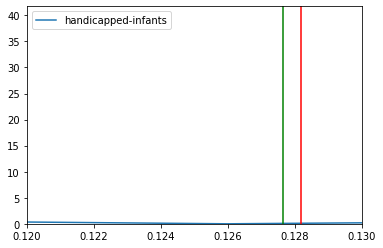

In [22]:
# Now let's visualize this comparison 
sns.kdeplot(rep_handi_inf_no_nans)
plt.axvline(rep_handi_conf[1], color='red')
plt.axvline(rep_handi_conf[2], color='red')
plt.axvline(rep_handi_inf_bayes[0], color='green')
plt.axvline(rep_handi_inf_bayes[1], color='green')
plt.axvline(rep_handi_conf[0], color='k')
plt.xlim(0.12, 0.13); # Checks for difference between frequentist and bayesian

In [23]:
# Let's compare the democrat's support! 
# First the frequentist approach:
dem_handi_conf = confidence_interval(dem_handi_inf)
dem_handi_conf

(0.6046511627906976, 0.5456230466811521, 0.6636792789002431)

In [25]:
# Deal with nulls
dem_handi_inf_no_nans = dem_column('handicapped-infants')
dem_handi_inf_no_nans.isnull().sum()

0

In [26]:
# The Bayesian approach:
dem_handi_inf_baye = stats.bayes_mvs(dem_handi_inf_no_nans, alpha=.95)[0][1]
dem_handi_inf_baye

(0.5445926997425515, 0.6647096258388437)

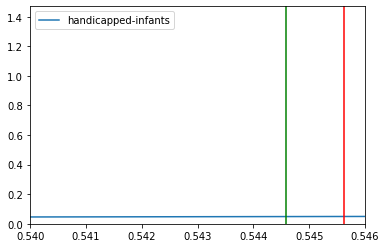

In [27]:
# Visualize!
sns.kdeplot(dem_handi_inf_no_nans)
plt.axvline(dem_handi_conf[1], color='red')
plt.axvline(dem_handi_conf[2], color='red')
plt.axvline(dem_handi_inf_baye[0], color='green')
plt.axvline(dem_handi_inf_baye[1], color='green')
plt.axvline(dem_handi_conf[0], color='k')
plt.xlim(0.540, 0.546); # Get a closer look at the diffences

#Let's try with a different dataset now!

In [28]:
# Let's try the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [29]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [30]:
# Seperate into different classes
first_class = df[df['Pclass']==1]
second_class = df[df['Pclass']==2]
third_class = df[df['Pclass']==3]
print(first_class)
print(second_class)
print(third_class)

     Survived  Pclass     Sex   Age     Fare     Embarked
1           1       1  female  38.0  71.2833    Cherbourg
3           1       1  female  35.0  53.1000  Southampton
5           0       1    male  54.0  51.8625  Southampton
10          1       1  female  58.0  26.5500  Southampton
20          1       1    male  28.0  35.5000  Southampton
..        ...     ...     ...   ...      ...          ...
694         1       1  female  47.0  52.5542  Southampton
695         0       1    male  33.0   5.0000  Southampton
701         1       1  female  56.0  83.1583    Cherbourg
709         1       1  female  19.0  30.0000  Southampton
710         1       1    male  26.0  30.0000    Cherbourg

[184 rows x 6 columns]
     Survived  Pclass     Sex   Age     Fare     Embarked
8           1       2  female  14.0  30.0708    Cherbourg
14          1       2  female  55.0  16.0000  Southampton
17          0       2    male  35.0  26.0000  Southampton
18          1       2    male  34.0  13.0000  So

In [31]:
# check for nulls
print(first_class.isnull().sum())
print(second_class.isnull().sum())
print(third_class.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64


In [0]:
# View only the survived column
survived_first_class = first_class['Survived'].values
survived_second_class = second_class['Survived'].values
survived_third_class = third_class['Survived'].values

In [0]:
# Find the confidence interval of each survive class
survived_first_conf_int = confidence_interval(survived_first_class)
survived_second_conf_int = confidence_interval(survived_second_class)
survived_third_conf_int = confidence_interval(survived_third_class)

In [34]:
# Look at first class' confidence interval
survived_first_conf_int

(0.6521739130434783, 0.5827087674767211, 0.7216390586102355)

In [35]:
# And Bayesian?
survived_first_baye = stats.bayes_mvs(survived_first_class, alpha=.95)[0][1]
survived_first_baye

(0.5827087674767211, 0.7216390586102355)

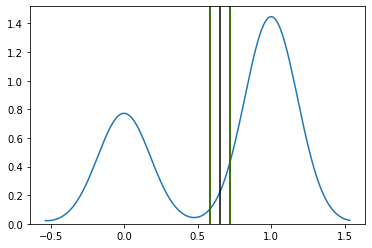

In [36]:
# Look at this graphically
sns.kdeplot(survived_first_class)
plt.axvline(survived_first_conf_int[1], color='red')
plt.axvline(survived_first_conf_int[2], color='red')
plt.axvline(survived_first_baye[0], color='green')
plt.axvline(survived_first_baye[1], color='green')
plt.axvline(survived_first_conf_int[0], color='k');
# The CI and Bayesian values are exactly the same in this instance
# The null value is not found between the lower and upper bounds so given the 
# data we could safely reject the null hypothesis

In [40]:
# Let's try second class
survived_second_class_conf_int = confidence_interval(survived_second_class)
survived_second_class_conf_int

(0.4797687861271676, 0.4045780048126607, 0.5549595674416745)

In [41]:
# Now Bayesian
survived_second_class_baye = stats.bayes_mvs(survived_second_class, alpha=.95)[0][1]
survived_second_class_baye

(0.4045780048126607, 0.5549595674416745)

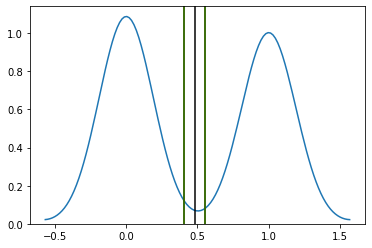

In [43]:
# Graph it!
sns.kdeplot(survived_second_class)
plt.axvline(survived_second_class_conf_int[1], color='red')
plt.axvline(survived_second_class_conf_int[2], color='red')
plt.axvline(survived_second_class_baye[0], color='green')
plt.axvline(survived_second_class_baye[1], color='green')
plt.axvline(survived_second_class_conf_int[0], color='k');
# Null value of 0.5 is found between the lower-bound and upper-bound
# values, so we would be unable to reject the null hypothesis given 
# this data

In [44]:
# Now let's look at third class
survived_third_conf_int

(0.23943661971830985, 0.19483025758052033, 0.2840429818560994)

In [45]:
# And Bayesian
survived_third_baye = stats.bayes_mvs(survived_third_class, alpha=.95)[0][1]
survived_third_baye

(0.19483025758052033, 0.2840429818560994)

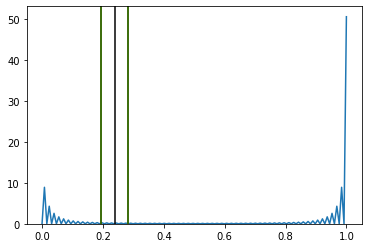

In [46]:
# Compare that graphically
sns.kdeplot(survived_third_class)
plt.axvline(survived_third_conf_int[1], color='red')
plt.axvline(survived_third_conf_int[2], color='red')
plt.axvline(survived_third_baye[0], color='green')
plt.axvline(survived_third_baye[1], color='green')
plt.axvline(survived_third_conf_int[0], color='k');

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# Reworked frequentist approaches using Bayesian above

##PyMC3

In [49]:
# imports and setup
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))


Running on PyMC3 v3.7


In [0]:
 # Models centered around Model class.
 # Create simple model to explore Model class
with pm.Model() as model:
  mu = pm.Normal('mu', mu=0, sigma=1)
  obs = pm.Normal('obs', mu=mu, sigma=1, observed=np.random.randn(100))

In [52]:
model.basic_RVs


[mu, obs]

In [53]:
model.free_RVs

[mu]

In [54]:
model.observed_RVs

[obs]

In [55]:
model.logp({'mu':0})

array(-138.99633166)

In [0]:
# If needing to use logp in a loop, it is best to first set it to 
# a variable then include the variable within the loop, as it will 
# run faster.

Probability Distributions

In [57]:
help(pm.Normal)

Help on class Normal in module pymc3.distributions.continuous:

class Normal(pymc3.distributions.distribution.Continuous)
 |  Univariate normal log-likelihood.
 |  
 |  The pdf of this distribution is
 |  
 |  .. math::
 |  
 |     f(x \mid \mu, \tau) =
 |         \sqrt{\frac{\tau}{2\pi}}
 |         \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}
 |  
 |  Normal distribution can be parameterized either in terms of precision
 |  or standard deviation. The link between the two parametrizations is
 |  given by
 |  
 |  .. math::
 |  
 |     \tau = \dfrac{1}{\sigma^2}
 |  
 |  .. plot::
 |  
 |      import matplotlib.pyplot as plt
 |      import numpy as np
 |      import scipy.stats as st
 |      plt.style.use('seaborn-darkgrid')
 |      x = np.linspace(-5, 5, 1000)
 |      mus = [0., 0., 0., -2.]
 |      sigmas = [0.4, 1., 2., 0.4]
 |      for mu, sigma in zip(mus, sigmas):
 |          pdf = st.norm.pdf(x, mu, sigma)
 |          plt.plot(x, pdf, label=r'$\mu$ = {}, $\sigma$ = {}'.format(m

Unobserved Random Variables (RVs)

In [0]:
# Every unobserved RV has following calling signature:
with pm.Model():
  x = pm.Normal('x', mu=0, sigma=1) # name(str), parameter keyword arguments

In [59]:
# And we can evaluate its logp
x.logp({'x':0})

array(-0.91893853)

Observed Random Variables (RVs)

In [0]:
# Defined just like unobserved, but requires data to be passed into keyword argument
# Observed supports lists, numpy.ndarray, theano, and pandas data structures
with pm.Model():
  obs = pm.Normal('x', mu=0, sigma=1, observed=np.random.randn(100))

In [61]:
obs.logp({'x':0})

array(-150.28528138)

Deterministic Transforms

In [0]:
# PyMC3 allows you to do algebra with RVs
with pm.Model():
  x = pm.Normal('x', mu=0, sigma=1)
  y = pm.Gamma('y', alpha=1, beta=1)
  plus_2 = x + 2
  squared = x ** 2
  sined = pm.math.sin(x)

In [64]:
# Trying to call these variables returns no_inplace values, because results 
# are not stored automatically.
print(plus_2)
print(squared)
print(sined)

Elemwise{add,no_inplace}.0
Elemwise{pow,no_inplace}.0
Elemwise{sin,no_inplace}.0


In [0]:
# We must use the format pm.Deterministic to keep transformed variable
with pm.Model():
  x=pm.Normal('x', mu=0, sigma=1)
  plus_2 = pm.Deterministic('x plus 2', x + 2)

Automatic transforms of bounded RVs

In [0]:
# Automaticaly transforms bounded RVs to be unbounded
with pm.Model() as model:
  x = pm.Uniform('x', lower=0, upper=1) # lower = lower-limit, upper = upper-limit

In [68]:
model.free_RVs

[x_interval__]

In [0]:
# x_interval__ represents x transformed to accept parameter values between
# -inf and +inf

In [70]:
model.deterministics

[x]

In [71]:
# Transforms can be turned off
with pm.Model() as model:
  x = pm.Uniform('x', lower=0, upper=1, transform=None)

  print(model.free_RVs)

[x]


In [73]:
# Different type of transformation can be assigned
import pymc3.distributions.transforms as tr

with pm.Model() as model:
  # Using default:
  x1 = pm.Gamma('x1', alpha=1, beta=1)
  # Specifying different:
  x2 = pm.Gamma('x2', alpha=1, beta=1, transform=tr.log_exp_m1)

  print("The default transformation is: " + x1.transformation.name)
  print("The user specified transformation is: " + x2.transformation.name)

The default transformation is: log
The user specified transformation is: log_exp_m1


In [76]:
!pip install arviz

     |████████████████████████████████| 1.4MB 2.9MB/s 
     |████████████████████████████████| 4.1MB 43.4MB/s 
     |████████████████████████████████| 317kB 51.0MB/s 


In [0]:
import arviz as ar

In [0]:
# Create our means and stds
first_class_mean = survived_first_class.mean()
first_class_mean
first_class_std = survived_first_class.std()
first_class_std
second_class_mean = survived_second_class.mean()
second_class_std = survived_second_class.std()
third_class_mean = survived_third_class.mean()
third_class_std = survived_third_class.std()

In [92]:
# Create our model for first class
with pm.Model() as model:
  mu = pm.Normal('mu', mu=first_class_mean, sigma=first_class_std)
  sd = pm.HalfNormal('sd', sigma=first_class_std)
  obs = pm.Normal('obs', mu=first_class_mean, sigma=first_class_std)

  step1 = pm.Metropolis(vars=[mu])
  step2 = pm.Slice(vars=[sd])
  trace = pm.sample(step=[step1, step2])

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [mu]
>Slice: [sd]
>NUTS: [obs]
100%|██████████| 1000/1000 [00:01<00:00, 955.27it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


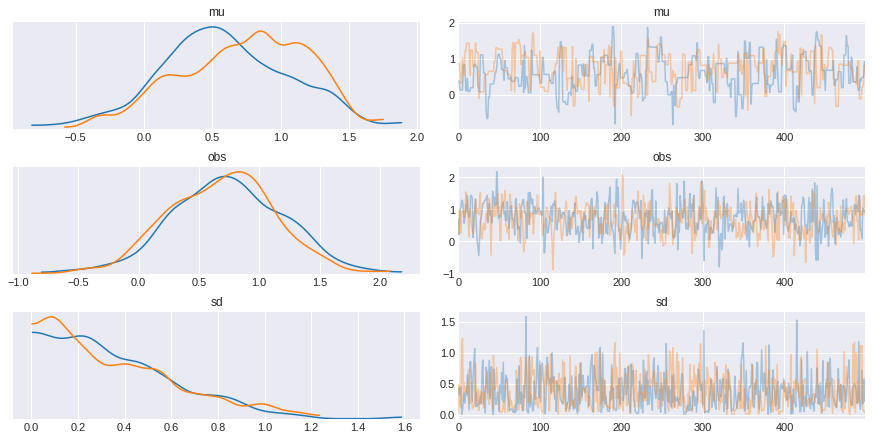

In [93]:
# Let's look at a trace plot for first class
ar.plot_trace(trace);

In [108]:
# Create our model for second class
with pm.Model() as model:
  mu = pm.Normal('mu', mu=second_class_mean, sigma=second_class_std)
  sd = pm.HalfNormal('sd', sigma=second_class_std)
  obs = pm.Normal('obs', mu=second_class_mean, sigma=second_class_std)

  step1 = pm.Metropolis(vars=[mu])
  step2 = pm.Slice(vars=[sd])
  trace2 = pm.sample(step=[step1, step2])

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [mu]
>Slice: [sd]
>NUTS: [obs]
100%|██████████| 1000/1000 [00:00<00:00, 1015.42it/s]
The number of effective samples is smaller than 25% for some parameters.


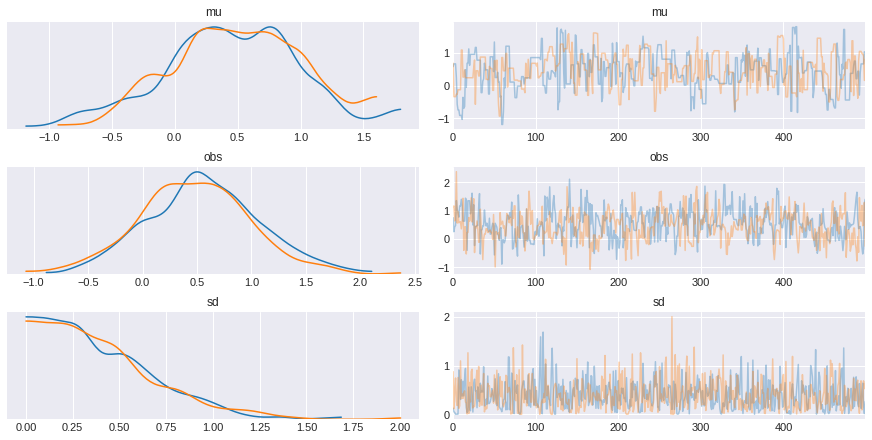

In [96]:
# trace plot for second class
ar.plot_trace(trace2);

In [97]:
# Create model for third class
with pm.Model() as model:
  mu = pm.Normal('mu', mu=third_class_mean, sigma=third_class_std)
  sd = pm.HalfNormal('sd', sigma=third_class_std)
  obs = pm.Normal('obs', mu=third_class_mean, sigma=third_class_std)

  step1 = pm.Metropolis(vars=[mu])
  step2 = pm.Slice(vars=[sd])
  trace3 = pm.sample(step=[step1, step2])

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [mu]
>Slice: [sd]
>NUTS: [obs]
100%|██████████| 1000/1000 [00:01<00:00, 978.53it/s]
The estimated number of effective samples is smaller than 200 for some parameters.


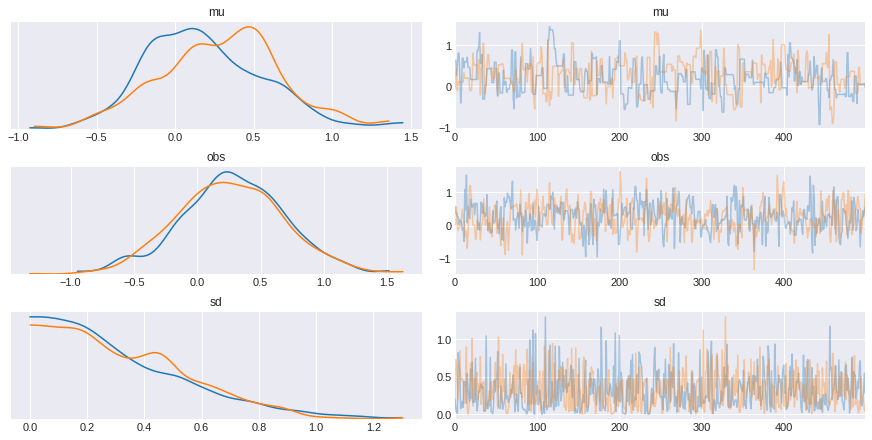

In [98]:
# trace plot third class
ar.plot_trace(trace3);

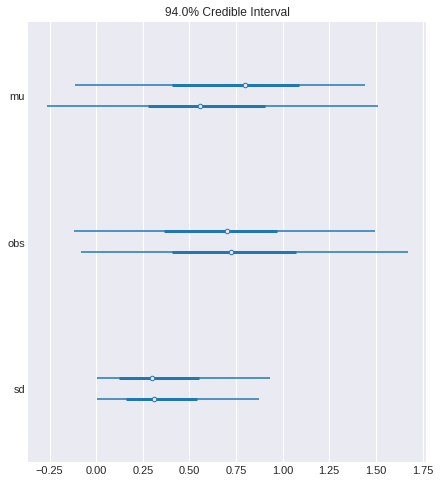

In [99]:
# Let's test out a forest plot for first class
ar.plot_forest(trace);

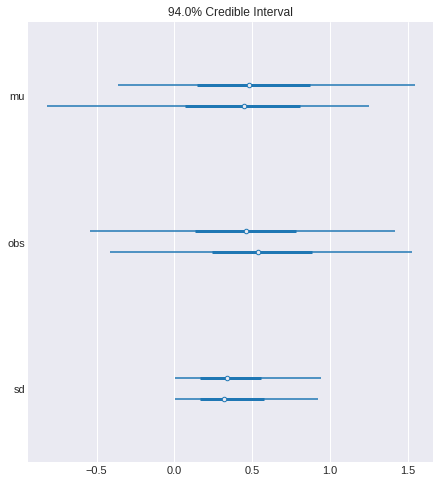

In [100]:
# and second class
ar.plot_forest(trace2);

(<Figure size 432x475.2 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f175fab7f28>],
       dtype=object))

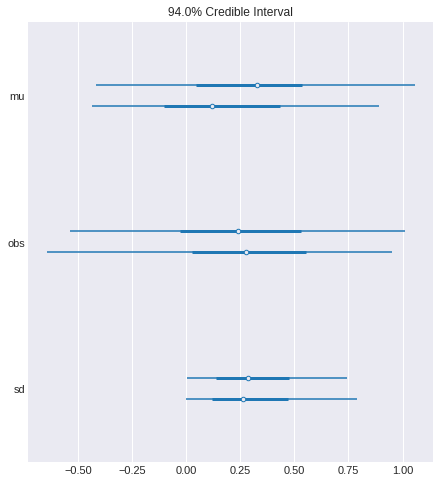

In [101]:
# and third class
ar.plot_forest(trace3)

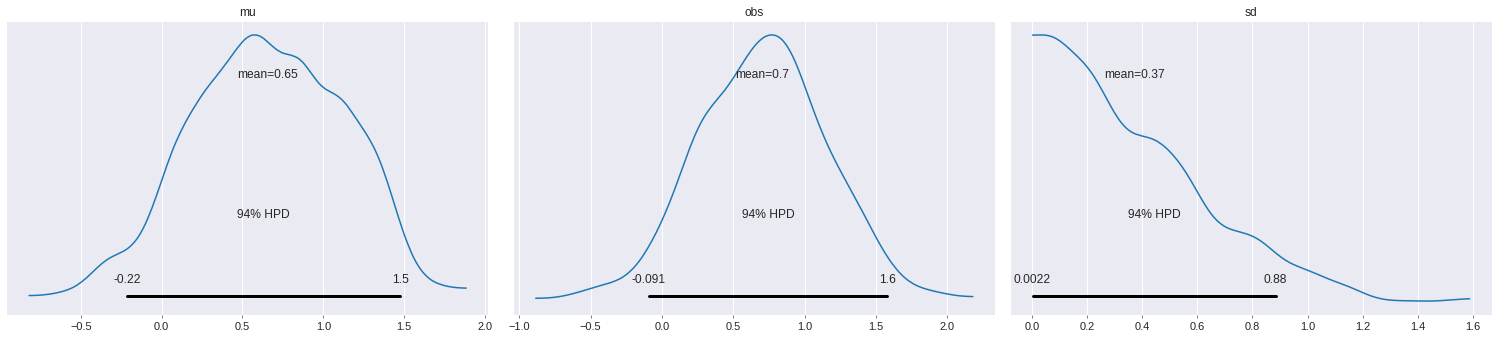

In [103]:
# Now posterior plot for first class
ar.plot_posterior(trace);

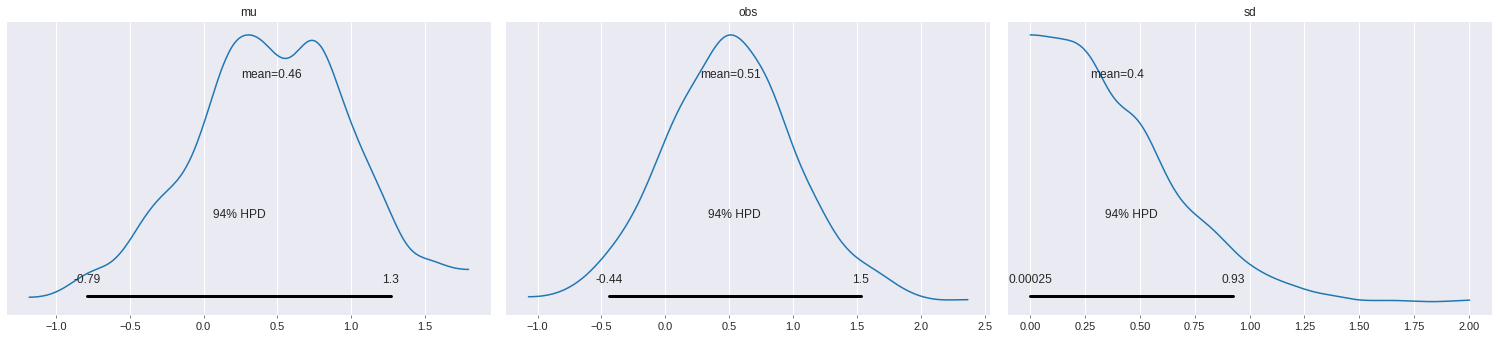

In [105]:
# second class 
ar.plot_posterior(trace2);

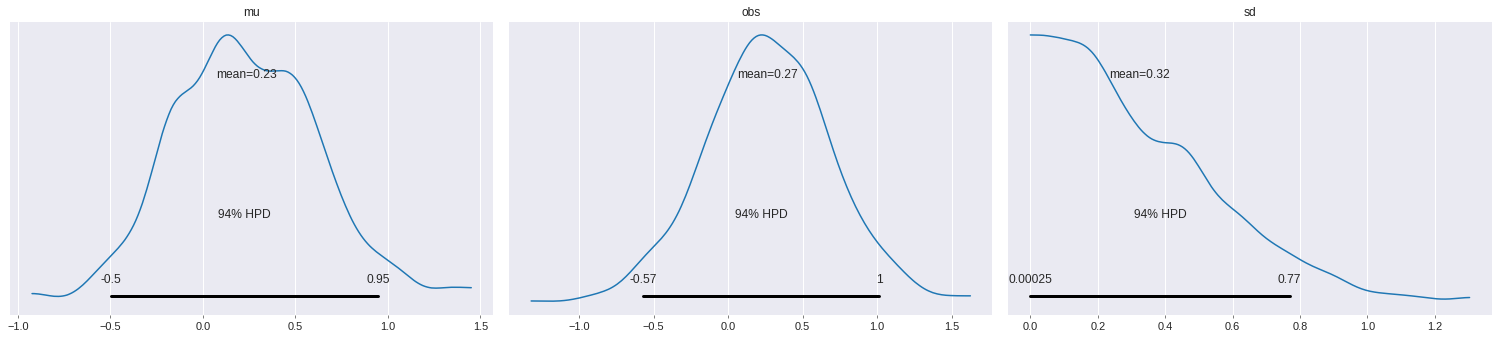

In [107]:
# and third class
ar.plot_posterior(trace3);